In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
df = pd.read_csv('earthquake_dataset.csv')

data_modified = df[['time', 'latitude', 'longitude', 'mag']]

data_modified['time'] = pd.to_datetime(df['time'])

data_modified.info()
data_modified.head()

# filtered_data_higher = df[data_modified['mag'] >= 5] 
# filtered_data_lower = df[data_modified['mag'] < 5]

# result_higher = filtered_data_higher[['mag']]
# result_lower = filtered_data_lower[['mag']]

# count_higher = filtered_data_higher['mag'].count()
# count_lower = filtered_data_lower['mag'].count()

# print(data_modified.head())

# print("Number of values with mag >= 5:", count_higher)

# print("Number of values with mag < 5:", count_lower)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       1650 non-null   datetime64[ns, UTC]
 1   latitude   1650 non-null   float64            
 2   longitude  1650 non-null   float64            
 3   mag        1650 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 51.7 KB


C:\Users\robin\AppData\Local\Temp\ipykernel_12316\4262284524.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['time'] = pd.to_datetime(df['time'])


,time,latitude,longitude,mag
0,2014-09-26 15:38:16+00:00,-20.1000,119.5340,4.4
1,2014-10-02 15:52:57.360000+00:00,-10.3478,113.2808,4.2
2,2014-10-02 19:46:04.280000+00:00,-9.0761,115.9067,4.1
3,2014-10-03 04:57:28.570000+00:00,-9.1953,110.3486,4.4
4,2014-10-03 05:26:29.940000+00:00,-9.4264,110.3297,4.5


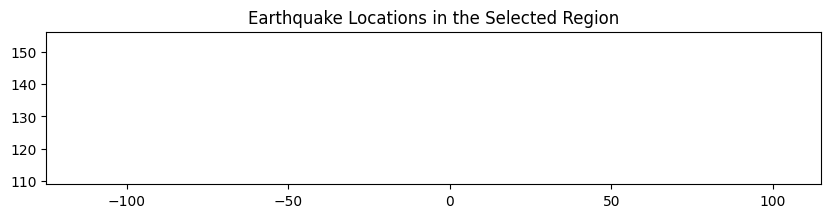

In [7]:
# Plot map of investigating region
df_geo = gpd.GeoDataFrame(data_modified, geometry = gpd.points_from_xy(df.longitude, df.latitude))

# Load the world map (downloaded from Natural Earth)
# Make sure you point this to the correct file location where the shapefiles are extracted
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Defining the extent (bounding box) of the map region 
min_lon, max_lon = -125, 115  # Longitude range
min_lat, max_lat = 108, 156     # Latitude range

# Plot the selected region
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, linewidth=1, color='black')
df_geo.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Set xlim and ylim to focus on the specifc area we have chosen
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

plt.title('Earthquake Locations in the Selected Region')
plt.show()